In [1]:
import numpy as np
from sklearn.svm import SVR

In [15]:
n_samples, n_features = 100, 5
np.random.seed(22)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X,y)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
clf.score(X,y)

0.35643863069196735

In [17]:
clf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
degrees = [2,3,4]
Cs = [0.5, 1, 2, 4, 8, 16, 32, 64, 128]
epsilons= [0.01, 0.1, 0.5, 1]
cv = GridSearchCV(SVR(), {'degree' : degrees, 'kernel' : ['rbf', 'poly'], 'C' : Cs, 'gamma' : ['auto'], 'epsilon' : epsilons} ,cv=5)

In [20]:
cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'degree': [2, 3, 4], 'kernel': ['rbf', 'poly'], 'C': [0.5, 1, 2, 4, 8, 16, 32, 64, 128], 'gamma': ['auto'], 'epsilon': [0.01, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
cv.best_estimator_.score(X,y)

0.20445016925690684

In [22]:
cv.cv_results_["mean_test_score"]

array([-8.10201166e-02, -6.90525356e-02, -8.30999908e-02, -7.54826466e-02,
       -8.46967645e-02, -6.41212919e-02, -4.73587729e-02, -1.10319194e-01,
       -8.10201166e-02, -2.10737809e-01, -8.30999908e-02, -1.64594627e-01,
       -8.46967645e-02, -1.04980166e-01, -4.73587729e-02, -4.22721132e-02,
       -8.10201166e-02, -5.32273934e-01, -8.30999908e-02, -4.57952482e-01,
       -8.46967645e-02, -2.72140369e-01, -4.73587729e-02, -1.63835985e-01,
       -1.26945282e-01, -1.62204890e-01, -1.27368420e-01, -1.70693479e-01,
       -1.26477407e-01, -1.16260957e-01, -8.51646563e-02, -1.38125786e-01,
       -1.26945282e-01, -4.29484433e-01, -1.27368420e-01, -5.48951142e-01,
       -1.26477407e-01, -3.02321158e-01, -8.51646563e-02, -7.72588531e-02,
       -1.26945282e-01, -1.50038965e+00, -1.27368420e-01, -1.36824447e+00,
       -1.26477407e-01, -6.35283681e-01, -8.51646563e-02, -2.25127916e-01,
       -2.62879855e-01, -2.17103223e-01, -2.54966432e-01, -1.84164530e-01,
       -1.68505392e-01, -

In [23]:
Cs

[0.5, 1, 2, 4, 8, 16, 32, 64, 128]

In [24]:
tilde_y = cv.best_estimator_.predict(X)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

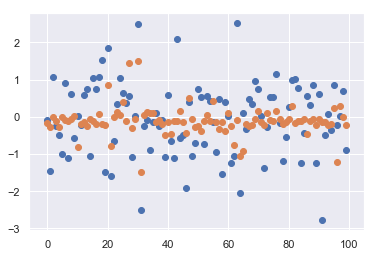

In [26]:
x = np.arange(len(y))
plt.scatter(x,y)
plt.scatter(x,tilde_y)